## Model Selection

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

##### K-Fold Cross Validation
The basic idea behind the need for cross validation is the variation of the data by spread and variance. I.e Test set gives us a fairly good understanding about how the model will perform on a random set of data but it sometimes fails to detect errors or it only gives the accuracy for a particular dataset. Now suppose the model's variance is very high, then it can give good accuracy for some datasets and low accuracy for some other models.

The basic idea behind K-fold cross validation is that we split the training data into $K$ folds. Train the model using $K-1$ folds and then validate the data based on $K^{th}$ fold. By this way we are able to understand the variance of the errors in different datasets and will be able to validate the model better, rather than just testing it on a test data. Another important help this method does is that it helps us identify overfitting, etc in our model.

##### Grid Search

Grid Search is an idea in which we give in some input parameters on basically what all parameters we wanna try our models with. The model will get trained on these parameters and will be able to validate using K-Fold method and the best parameters will be identified and we can build the model based on that.

<a id='preprocessing'></a>
### Pre processing

In [3]:
## importing the libraries for simple linear regression.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
x = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

<a id='building'></a>
### Building the model.
Training the model using [SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
This model uses the kernel as rbf as default, here we use linear.

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [24]:
classifier = SVC(kernel='rbf', random_state=0,C=0.8, gamma=0.8)
classifier.fit(x_train, y_train)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("The mean of accuracies is", accuracies.mean()*100, "%")
print("The mean of accuracies is", accuracies.std()*100, "%")

The mean of accuracies is 90.71968854282535 %
The mean of accuracies is 6.689400591227203 %


So we can say that this model trains with a very good accuracy and with a decent variance.

##### Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [21]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [.5, .6, .7, .8, .9, 1, 1.1, 1.2], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [22]:
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [23]:
print('The best accuracy obtained was', best_accuracy)
print('The best parameters obtained was', best_parameters)

The best accuracy obtained was 0.9066666666666666
The best parameters obtained was {'C': 0.8, 'gamma': 0.8, 'kernel': 'rbf'}


<a id='result'></a>
### Result

In [28]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

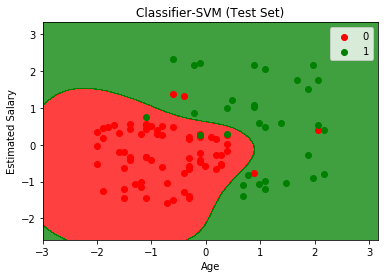

In [29]:
plot_regions(x_test, y_test, 'Classifier-SVM (Test Set)')

### Conclusion
We can see that, by using this library we are able to select the parameters effectively and validate them.